# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [ ]:
DATA_FOLDER = '' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [115]:
from IPython.core.display import HTML
#HTML(filename='/Users/sonia/Documents/GitHub/ADA2017-Tutorials/02 - Intro to Pandas/Data'+'/titanic.html')



For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

We start by loading the data into a pandas dataframe and call it `titanic`:

In [2]:
import pandas as pd
import numpy as np
titanic = pd.read_excel('/Users/sonia/Documents/GitHub/ADA2017-Tutorials/02 - Intro to Pandas/Data/titanic.xls')
titanic.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


**question 1**
Titanic contains 1309 observations of 14 variables, which we can see via the function `titanic.shape()`. It contains numereous missing values represented by `NaN` as we can check with in the code below.

In [3]:
#check if the dataFrame contains any NaN values 
np.any(titanic.isnull())

True

We can view the default types of each variable in the cell bellow

In [4]:
Type=titanic.dtypes
Type.name='Type'
Type

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
Name: Type, dtype: object

However, several variables- such as class, the sex and the embarkation site of the passengers- which are represented here by integers or doubles, could be more efficiently described with categorical values.
For example, the variable pclass takes values in $[1,2,3]$ according to the travelling class of the passenger and thus does not represent an actual numerical value.

In the cell bellow, we change the type of the variables mentionned above to `Categorical`.


In [5]:
titanic.pclass=pd.Categorical(titanic.pclass,ordered=True)
titanic.sex=pd.Categorical(titanic.sex)
titanic.embarked=pd.Categorical(titanic.embarked)

We now construct a table to summarize the type of all variables and eventually their range (if they are Integer or Double).

In [6]:
description = titanic.describe()
description.columns
description=description.drop('body',axis=1)
description=description.transpose()
description=description.drop(['count','std','25%','50%','75%'],axis=1)
result = pd.concat([Type, description], axis=1)
result.fillna('-')

,Type,mean,min,max
age,float64,29.8811,0.1667,80
boat,object,-,-,-
body,float64,-,-,-
cabin,object,-,-,-
embarked,object,-,-,-
fare,float64,33.2955,0,512.329
home.dest,object,-,-,-
name,object,-,-,-
parch,int64,0.385027,0,9
pclass,int64,-,-,-


**question 2**

In this section, we will draw histograms of some key variables. For this purpose we first import the necessary libraries (`matplotlib`,`seaborn`) 

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.gridspec as gridspec

We first create a figure and divide it into 4 subplots where the histograms for each variables are drawn.
We then define a function `create_plot`that takes as an argument the name of the variable we want to plot, the names of the X and Y axis and the subplot we want to plot in. The function calls `countplot` of the seaborn library and sets the xlabel, ylab and the title. It will be used to plot the distribution of the number of passengers according to travelling class, sex and embarkation sites. 

The age histogram however, is treated separately since the variable in question is not discrete. We will first round it to the closest decade and then apply the same steps as previously.


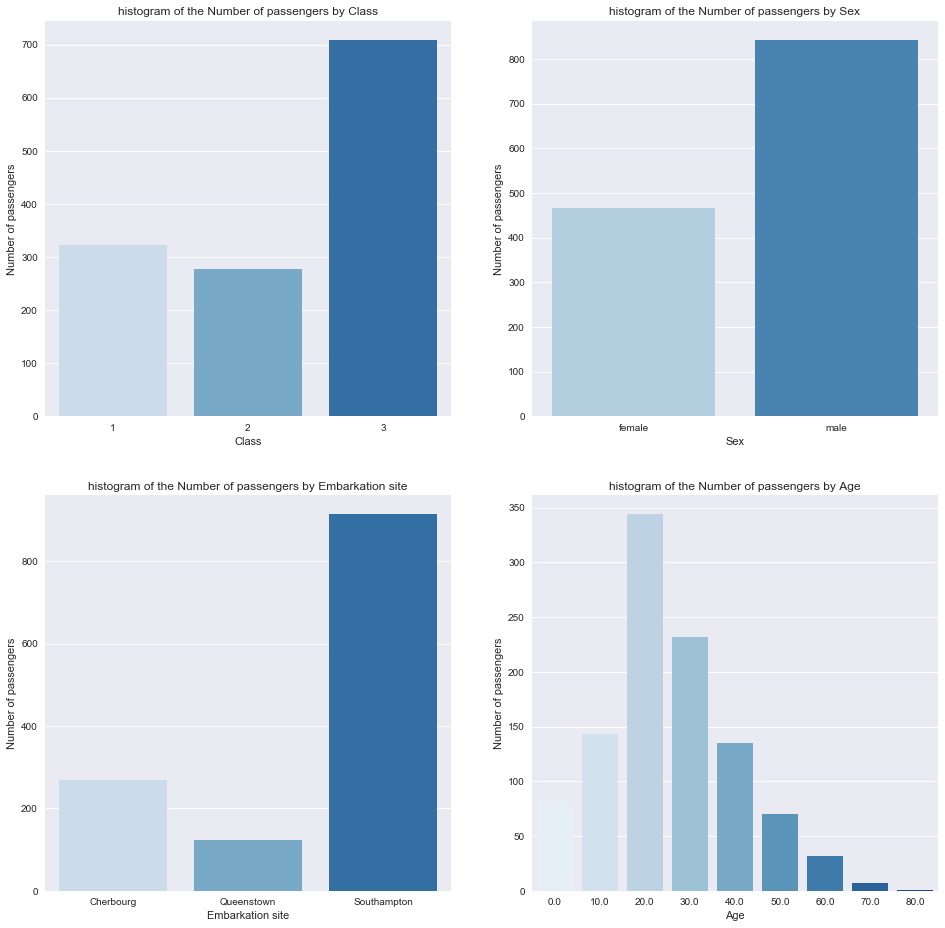

In [10]:
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(16, 16))
def create_plot (var,xlab,ylab,axis): 
    sns.countplot(x=var,data=titanic, palette="Blues", ax=axis)
    axis.set_ylabel(ylab)
    axis.set_xlabel(xlab)    
    axis.set_title('histogram of the '+ylab+' by '+xlab)

create_plot('pclass','Class','Number of passengers',ax1)
create_plot('sex','Sex','Number of passengers',ax2)

# EMBARKATION SITE : Set the name of the embarkation sites as labels for x-axis (instead of simply the first letters)
create_plot('embarked','Embarkation site','Number of passengers',ax3)
embark_sites = ['Cherbourg','Queenstown','Southampton']
ax3.set_xticklabels(embark_sites)

#In order to plot the bar plot of the age variable , we first need to round it to the closest decade
age_round= [np.floor(x/10)*10 for x in titanic.age]
age_round
sns.countplot(age_round,palette='Blues',ax=ax4)
ax4.set_ylabel('Number of passengers')
ax4.set_xlabel('Age')    
ax4.set_title('histogram of the Number of passengers by Age')



**Question 3**

*Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.*

The cabin identification of each passenger is given by the variable `cabin`. This variable is a `string` created by the concatenation of the floor identifcation (an upper-case letter) and the number of the cabin. Hence, in order to obtain the number of passengers on each floor, we have to extract the letter from the `cabin` variable and count the number of its occurences in the column.

In [13]:
import string as st
#We replace NaN values by '-' 
titanic.cabin=titanic.cabin.fillna('-')
letters = st.ascii_uppercase

#Define a function extract_floor : given a string, it will extract the first uppercase letter it contains.
def extract_floor (cabin):
    ind=pd.Series([-1])
    for i in letters:
        ind[i]=cabin.find(i)
        
    ind=ind.transpose()
    result=ind[ind.values>-1].index[0]
        
    return result
#Create a new column in titanic where we will store the floor identification letter and initialize it with '-'
titanic['floor']='-'
#Extract the floor identification for each passenger in the dataset and store it in the column 'floor'
for i in titanic.index:
    if titanic.cabin[i]!='-':
        titanic.floor[i]=  extract_floor(str(titanic.cabin[i]))

  

/Users/sonia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
# OVerview of the dataFrame with the new column
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,floor
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C


The next step consists in constructing the pie chart.
We will first define the floor variable as categorical and count the number of elements in each category.Thenm we will call the function `pie()`to create the pie chart and set the corresponding parameters.

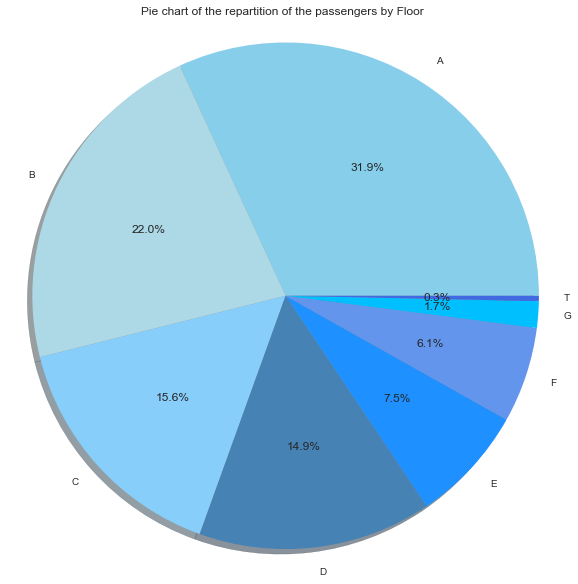

In [8]:
#set the floor variable as Categorical and count the number of observations in each category 
titanic.floor=pd.Categorical(titanic.floor)
data=titanic.floor.value_counts()

#create the pie chart 
labels = data.index.categories[1:]
values = data.values[1:]
colors =['skyblue','lightblue','lightskyblue','steelblue','dodgerblue','cornflowerblue','deepskyblue','royalblue']
f, ax = plt.subplots(1,1, figsize=(8,8),)
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True,colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.title('Pie chart of the repartition of the passengers by Floor')
plt.show()



**Question 4**

*For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.*

We will use the `.grouby()` function to aggregate our observations by class and then apply `.sum()` to count the number of observations in each class.
We will store the results in a dataFrame called *survival_class* and add a new column containing the proportion of the survivors in each class. 


In [9]:
survival_class=pd.DataFrame(titanic.survived.groupby(titanic.pclass).sum())
survival_class['proportion']=100*survival_class.survived/survival_class.survived.sum()
#view the dataFrame
survival_class

,survived,proportion
pclass,,
1,200,40.0
2,119,23.8
3,181,36.2


WE will now plot the results of the dataframe above into a pie chart.

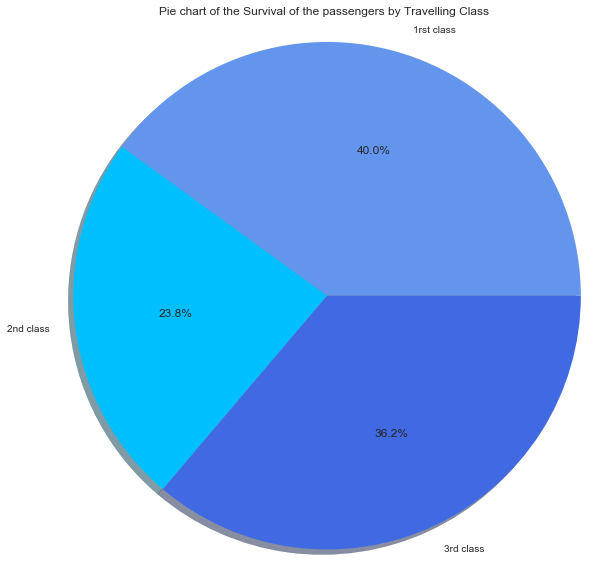

In [10]:
#Set the labels
labels = ['1rst class','2nd class','3rd class']
#access the "survived" column in the "survival_class" dataframe created above.
values = survival_class.survived.values
colors =['cornflowerblue','deepskyblue','royalblue']
#create the pie chart 
f, ax = plt.subplots(1,1, figsize=(8,8),)
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True,colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.title('Pie chart of the Survival of the passengers by Travelling Class')
plt.show()

**Question 5 **

*Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.*

The aim of this part is to compute the proportion of survivors not only by class but also by sex.For this purpose, we will use the `.groupby()`function with the list `[titanic.pclass, titanic.sex]` as argument. 

In [24]:
survival_class_sex=pd.DataFrame(titanic.survived.groupby([titanic.pclass,titanic.sex]).sum())
survival_class_sex['proportion'] = survival_class_sex.groupby(level=1).apply(lambda x:100 * x / x.sum())
survival_class_sex

survived  proportion
pclass sex                         
1      female       139   41.002950
       male          61   37.888199
2      female        94   27.728614
       male          25   15.527950
3      female       106   31.268437
       male          75   46.583851

The histograms are drawn using the function `factorplot` of the seaborn library. 

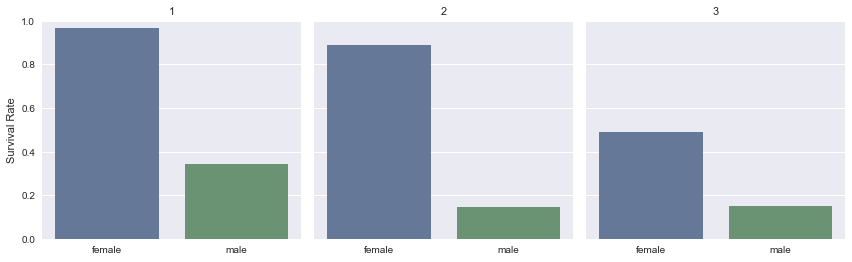

In [25]:

g = sns.factorplot(x='sex', y='survived', col='pclass',data=titanic, saturation=.5,kind='bar', ci=None)
(g.set_axis_labels('', 'Survival Rate')
   .set_titles('{col_name}')
   .set(ylim=(0, 1))
   .despine(left=True)) 

As the figure above shows, the survival rate is higher for women than for men for all classes.
However we notice that the survival rate for both genders is lower in the second and even more in the third classes compared to the first one.

**Question 6:**

*Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.*

In order to create 2 (almost) equally populated age categories, we need to find the median of the age variable and divide the dataset along that point. 

We have to note that this method excludes the rows where the age is missing and thus the union of both catgeories won't cover the whole dataset.

In [15]:
age_median= titanic.age.median()
print('The age median in the dataset is '+str(age_median))

The age median in the dataset is 28.0


In [17]:
#sub-dataset containing the passengers who are older than 28
age_category_1=titanic.loc[titanic.age>age_median]
#sub-dataset containing the passengers who are younger than 28
age_category_2=titanic.loc[titanic.age<=age_median]

For each category, we compute the proportion of survivors relative to the total number of passengers in that category.

In [18]:
# We compute the proportion of survivors in each category 
# here we divide by the total number of persons in the category
survival_1=100*age_category_1.survived.sum()/age_category_1.shape[0] 
survival_2=100*age_category_2.survived.sum()/age_category_2.shape[0]

In [19]:
# We compute the number of Men/Women who survived in each category 
sex_1=age_category_1.survived.groupby([age_category_1.sex]).sum()
sex_2=age_category_2.survived.groupby([age_category_2.sex]).sum()
#we divide by the total number of persons in the category
sex_1=100*sex_1/age_category_1.shape[0] 
sex_2=100*sex_2/age_category_2.shape[0] 

In [20]:
# We compute the number of first/second/third class survivors in each category 
class_1=age_category_1.survived.groupby([age_category_1.pclass]).sum()
class_2=age_category_2.survived.groupby([age_category_2.pclass]).sum()
# we divide by the total number of passengers in the category
class_1=100*class_1/age_category_1.shape[0] 
class_2=100*class_2/age_category_2.shape[0]

In [22]:
# we create a dataFrame containing all the proportions computed above.
frame = pd.DataFrame(np.arange(12).reshape((2, 6)), 
                  index =['age category 1', 'age category 2'], 
                  columns =[['% by Sex','% by Sex','% by travelling Class','% by travelling Class','% by travelling Class','% of the category'],
                            ['Women','Men','1st class','2nd class','3rd class','']])

frame.loc[:,'% of the category']=[survival_1 , survival_2]
frame.loc['age category 1','% by Sex']= sex_1.values
frame.loc['age category 2','% by Sex']= sex_2.values
frame.loc['age category 1','% by travelling Class']= class_1.values
frame.loc['age category 2','% by travelling Class']= class_2.values

frame

% by Sex            % by travelling Class             \
                    Women        Men             1st class  2nd class   
age category 1  28.627451  11.960784             24.509804   9.411765   
age category 2  27.238806  13.805970             10.447761  12.500000   

                          % of the category  
                3rd class                    
age category 1   6.666667         40.588235  
age category 2  18.097015         41.044776

The columns of the dataFrame are indexed hierarchically. 